In [ ]:
import pandas as pd;
import numpy as np;
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;

In [ ]:
data = pd.read_excel('C:\\Users\\shreyas.raghavan\\Desktop\\NLP\\ASSN- W2\\ABC_Reviews.xlsx', error_bad_lines=False);

In [4]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [5]:
print(data.fullReview.unique())
data.head()

["Having come here over the years (since first built) I find one fault.. We all know that between the food, hotels and merchandise and the high ticket prices along with the $20.00 per day parking, Disney is raking in tremendous bucks. I have no quarrel with that, but it would be nice if they updated their rides & attractions. The Hall of Presidents forces them to update for each new President, good thing we don't have a dictator :) Sure they have the new Seven Dwarfs Mine Train + Be Our Guess (they make even more money here) + some other minor things, but it's time to pure some of those huge profits back into the park. If your a child you probably could care less, but children are brought by their parents who do notice. Make more 'magic' Disney suits!"
 "If you want to spend one day in Disney World. Magic Kingdom is where it's at. Epcot is worldly cuisine and you can drink alcohol while Animal Kingdom is part zoo and safari. 1 Day per kingdom. If you get park hopper, it's hard to finis

,fullReview
0,Having come here over the years (since first b...
1,If you want to spend one day in Disney World. ...
2,This is the place to go to brig out the child ...
3,Been to Disney too many times to count. My mos...
4,No matter how many times we go to Epcot we hav...


In [6]:
data=data.fullReview.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))



In [15]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [16]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['having', 'come', 'here', 'over', 'the', 'years', 'since', 'first', 'built', 'find', 'one', 'fault', 'we', 'all', 'know', 'that', 'between', 'the', 'food', 'hotels', 'and', 'merchandise', 'and', 'the', 'high', 'ticket', 'prices', 'along', 'with', 'the', 'per', 'day', 'parking', 'disney', 'is', 'raking', 'in', 'tremendous', 'bucks', 'have', 'no', 'quarrel', 'with', 'that', 'but', 'it', 'would', 'be', 'nice', 'if', 'they', 'updated', 'their', 'rides', 'attractions', 'the', 'hall', 'of', 'presidents', 'forces', 'them', 'to', 'update', 'for', 'each', 'new', 'president', 'good', 'thing', 'we', 'don', 'have', 'dictator', 'sure', 'they', 'have', 'the', 'new', 'seven_dwarfs_mine_train', 'be', 'our', 'guess', 'they', 'make', 'even', 'more', 'money', 'here', 'some', 'other', 'minor', 'things', 'but', 'it', 'time', 'to', 'pure', 'some', 'of', 'those', 'huge', 'profits', 'back', 'into', 'the', 'park', 'if', 'your', 'child', 'you', 'probably', 'could', 'care', 'less', 'but', 'children', 'are', 'br

In [19]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
print(data_words_bigrams[:1])

[['come', 'years', 'since', 'first', 'built', 'find', 'one', 'fault', 'know', 'food', 'hotels', 'merchandise', 'high', 'ticket', 'prices', 'along', 'per', 'day', 'parking', 'disney', 'raking', 'tremendous', 'bucks', 'quarrel', 'would', 'nice', 'updated', 'rides', 'attractions', 'hall', 'presidents', 'forces', 'update', 'new', 'president', 'good', 'thing', 'dictator', 'sure', 'new', 'seven_dwarfs', 'mine_train', 'guess', 'make', 'even', 'money', 'minor', 'things', 'time', 'pure', 'huge', 'profits', 'back', 'park', 'child', 'probably', 'could', 'care', 'less', 'children', 'brought', 'parents', 'notice', 'make', 'magic', 'disney', 'suits']]


In [20]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)]]


In [21]:
id2word[0]

'along'

In [22]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('along', 1),
  ('attractions', 1),
  ('back', 1),
  ('brought', 1),
  ('bucks', 1),
  ('built', 1),
  ('care', 1),
  ('child', 1),
  ('children', 1),
  ('come', 1),
  ('could', 1),
  ('day', 1),
  ('dictator', 1),
  ('disney', 2),
  ('even', 1),
  ('fault', 1),
  ('find', 1),
  ('first', 1),
  ('food', 1),
  ('forces', 1),
  ('good', 1),
  ('guess', 1),
  ('hall', 1),
  ('high', 1),
  ('hotels', 1),
  ('huge', 1),
  ('know', 1),
  ('less', 1),
  ('magic', 1),
  ('make', 2),
  ('merchandise', 1),
  ('mine_train', 1),
  ('minor', 1),
  ('money', 1),
  ('new', 2),
  ('nice', 1),
  ('notice', 1),
  ('one', 1),
  ('parents', 1),
  ('park', 1),
  ('parking', 1),
  ('per', 1),
  ('president', 1),
  ('presidents', 1),
  ('prices', 1),
  ('probably', 1),
  ('profits', 1),
  ('pure', 1),
  ('quarrel', 1),
  ('raking', 1),
  ('rides', 1),
  ('seven_dwarfs', 1),
  ('since', 1),
  ('suits', 1),
  ('sure', 1),
  ('thing', 1),
  ('things', 1),
  ('ticket', 1),
  ('time', 1),
  ('tremendous', 1),
 

In [23]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
num_topics=10

In [24]:
print(lda_model.print_topics())
doc_lda = (lda_model[corpus])

[(0, '0.072*"fast" + 0.070*"ride" + 0.059*"pass" + 0.028*"line" + 0.027*"passes" + 0.027*"wait" + 0.022*"system" + 0.018*"minutes" + 0.017*"new" + 0.015*"hour"'), (1, '0.043*"disney" + 0.039*"go" + 0.036*"time" + 0.031*"world" + 0.023*"great" + 0.023*"kids" + 0.019*"place" + 0.016*"fun" + 0.015*"rides" + 0.015*"much"'), (2, '0.049*"christmas" + 0.046*"fireworks" + 0.034*"show" + 0.031*"parade" + 0.027*"night" + 0.023*"castle" + 0.019*"mickey" + 0.019*"party" + 0.018*"parades" + 0.016*"beautiful"'), (3, '0.178*"magic" + 0.175*"kingdom" + 0.095*"epcot" + 0.058*"animal" + 0.038*"hollywood_studios" + 0.012*"visitors" + 0.010*"studios" + 0.008*"test_track" + 0.007*"safari" + 0.007*"tower"'), (4, '0.051*"pay" + 0.043*"bands" + 0.041*"might" + 0.029*"main" + 0.029*"top" + 0.029*"gets" + 0.027*"entire" + 0.027*"holidays" + 0.021*"please" + 0.019*"liked"'), (5, '0.053*"park" + 0.044*"get" + 0.037*"day" + 0.023*"food" + 0.017*"plan" + 0.015*"take" + 0.015*"long" + 0.014*"good" + 0.014*"rides" + 

In [145]:
def get_lda_topics(model, num_topics):
    word_dict = {}
    topics = model.show_topics(num_topics,20)
    word_dict = {'Topic '+str(i):[x.split('*') for x in words.split('+')] \
                 for i,words in lda_model.show_topics(10,1000000)}
    return pd.DataFrame.from_dict(word_dict)

In [146]:
fin1=get_lda_topics(lda_model, 10)
fin1=fin1.transpose()
fin1.to_csv("C:\\Users\\shreyas.raghavan\\Desktop\\NLP\\ASSN- W2\\topic-contributor_matrix.csv")

In [147]:
a=[]
for i in range(len(corpus)):
    a.append(lda_model[corpus[i]])
    i=i+1
    

In [148]:
b=pd.DataFrame(a)
c=pd.DataFrame(b[2])
c.head()

,2
0,"[(0, [(5, 0.99984324)]), (1, [(5, 0.31272757),..."
1,"[(11, [(5, 1.9999762)]), (13, [(1, 0.5688842),..."
2,"[(7, [(1, 0.99990815)]), (118, []), (119, [(7,..."
3,"[(13, [(1, 0.4003992), (8, 0.5995937)]), (14, ..."
4,"[(37, [(1, 0.05659226), (5, 0.32899392), (8, 0..."


In [154]:
a= (lda_model.get_document_topics(corpus, minimum_probability=0.0))

In [179]:
distributions = np.array(lda_model[corpus])[:,:,1]

In [181]:
fin2=pd.DataFrame(distributions)
fin2.to_csv('C:\\Users\\shreyas.raghavan\\Desktop\\NLP\\ASSN- W2\\topic-document_matrix.csv')

In [191]:
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = lda_model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [203]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)

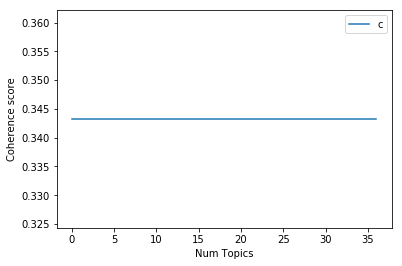

In [204]:
# Show graph
import matplotlib.pyplot as plt
limit=40; start=0; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()